In [1]:
import numpy as np
import os 
import h5py
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'
import glob
from natsort import natsorted
from sklearn.model_selection import train_test_split

In [2]:
folder_dir = 'data/raw_knee2d'
rawfiles = natsorted(glob.glob(os.path.join(folder_dir, '*.h5')))
print(len(rawfiles))

199


In [3]:
train_val_rawfile, test_rawfile = train_test_split(rawfiles, test_size = 0.1, random_state = 1)

In [4]:
train_rawfile, val_rawfile = train_test_split(train_val_rawfile, test_size = 0.05, random_state = 1)

In [5]:
print(len(train_rawfile), len(val_rawfile), len(test_rawfile))

170 9 20


In [6]:
import logging

In [7]:
logger = logging.getLogger('VN-SPIRIT')

In [8]:
handler = logging.StreamHandler()
handler.setFormatter(logging.Formatter(logging.BASIC_FORMAT, None))
logger.addHandler(handler)


In [9]:
import json
config = {"train": train_rawfile, "test":test_rawfile}

with open("config/knee2d_data_selection.json", 'w') as f:
    json.dump(config, f)

In [10]:
with open("config/knee2d_data_selection.json", 'r') as f:
    config2 = json.load(f)

In [11]:
print(config2)

{'train': ['data/raw_knee2d/file1000356.h5', 'data/raw_knee2d/file1000073.h5', 'data/raw_knee2d/file1001968.h5', 'data/raw_knee2d/file1001977.h5', 'data/raw_knee2d/file1001077.h5', 'data/raw_knee2d/file1000283.h5', 'data/raw_knee2d/file1000264.h5', 'data/raw_knee2d/file1001793.h5', 'data/raw_knee2d/file1001168.h5', 'data/raw_knee2d/file1001440.h5', 'data/raw_knee2d/file1001668.h5', 'data/raw_knee2d/file1000817.h5', 'data/raw_knee2d/file1000389.h5', 'data/raw_knee2d/file1001163.h5', 'data/raw_knee2d/file1002417.h5', 'data/raw_knee2d/file1001983.h5', 'data/raw_knee2d/file1001444.h5', 'data/raw_knee2d/file1000758.h5', 'data/raw_knee2d/file1001916.h5', 'data/raw_knee2d/file1001834.h5', 'data/raw_knee2d/file1001651.h5', 'data/raw_knee2d/file1001643.h5', 'data/raw_knee2d/file1001057.h5', 'data/raw_knee2d/file1001331.h5', 'data/raw_knee2d/file1000593.h5', 'data/raw_knee2d/file1002351.h5', 'data/raw_knee2d/file1000858.h5', 'data/raw_knee2d/file1000052.h5', 'data/raw_knee2d/file1000496.h5', 'da

In [22]:
def generate_mask_alpha(size=[128,128], r_factor_designed=5.0, r_alpha=3, axis_undersample=1,
                        acs=3, seed=0, mute=0):
    # init
    mask = np.zeros(size)
    if seed>=0:
        np.random.seed(seed)
    # get samples
    num_phase_encode = size[axis_undersample]
    num_phase_sampled = int(np.floor(num_phase_encode/r_factor_designed))
    # coordinate
    coordinate_normalized = np.array(range(num_phase_encode))
    coordinate_normalized = np.abs(coordinate_normalized-num_phase_encode/2)/(num_phase_encode/2.0)
    prob_sample = coordinate_normalized**r_alpha
    prob_sample = prob_sample/sum(prob_sample)
    # sample
    index_sample = np.random.choice(num_phase_encode, size=num_phase_sampled, 
                                    replace=False, p=prob_sample)
    # sample                
    if axis_undersample == 0:
        mask[index_sample,:]=1
    else:
        mask[:,index_sample]=1

    # compute reduction
    r_factor = len(mask.flatten())/sum(mask.flatten())
    if not mute:
        print('gen mask size of {1} for R-factor={0:.4f}'.format(r_factor, mask.shape))
        print(num_phase_encode, num_phase_sampled, np.where(mask[0,:]))

    return mask, r_factor

In [29]:
mask, r_factor = generate_mask_alpha(size=(256,320),r_alpha=0.2,acs=20)

gen mask size of (256, 320) for R-factor=5.0000
320 64 (array([  5,  16,  19,  23,  25,  27,  29,  32,  35,  37,  39,  43,  44,
        56,  57,  58,  68,  71,  74,  90, 104, 105, 107, 112, 123, 126,
       131, 138, 140, 142, 171, 174, 181, 182, 190, 191, 202, 206, 207,
       215, 217, 219, 220, 224, 225, 228, 233, 239, 257, 258, 262, 264,
       270, 273, 275, 284, 290, 299, 304, 305, 310, 312, 314, 316]),)


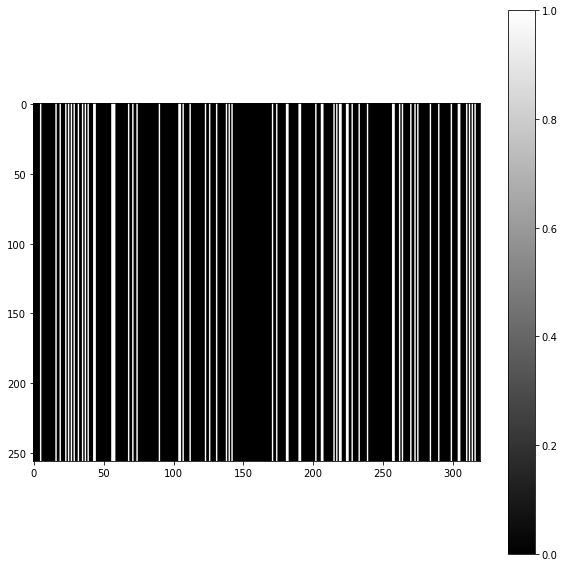

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
plt.colorbar()